<h1>WineRanks: Sip, Savor, and Predict</h1>

Lab Three: Extending Logistic Regression

Emily Liss

<H1>Business Understanding</H1>

Wine producers and marketers often strive to create wines that cater to the diverse preferences of consumers. Predicting the quality of wine based on its chemical properties can help wineries improve production processes, target the right market segments, and make informed decisions regarding pricing and marketing strategies. This dataset aims to leverage a machine learning model to predict wine quality and assist wineries in enhancing their wine production and marketing efforts. The set includes data for each wine tested's: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality (on a scale from 1-10), and Id. With this data, wineries can ensure consistent wine quality, reducing the risk of producing subpar wines and enhancing brand reputation. This model would most likely be used offline for research purposes, historical analysis, or batch processing where wine quality assessment isn't time-sensitive. We would need to compare the model predictions against expert sommeliers' opinions to determine a benchmark on how useful the model is.

Dataset Source: https://www.kaggle.com/datasets/naliniajwani/wine-quality-prediction-dataset

<H1>Load and Prepare Data</H1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

#Read in the dataset
ds = pd.read_csv('C:/Users/emily/Downloads/WineArchive/WineQuality.csv')
#clean data, remove empty cells
ds = ds.drop(columns=['Id'])
ds = ds.dropna()
ds.describe()


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<h3>Pairplot showing how different aspects relate to the quality of the wine</h3>

I've removed the columns with the smallest standard diviation for this model to show factors that would have more correlation to the wine quality

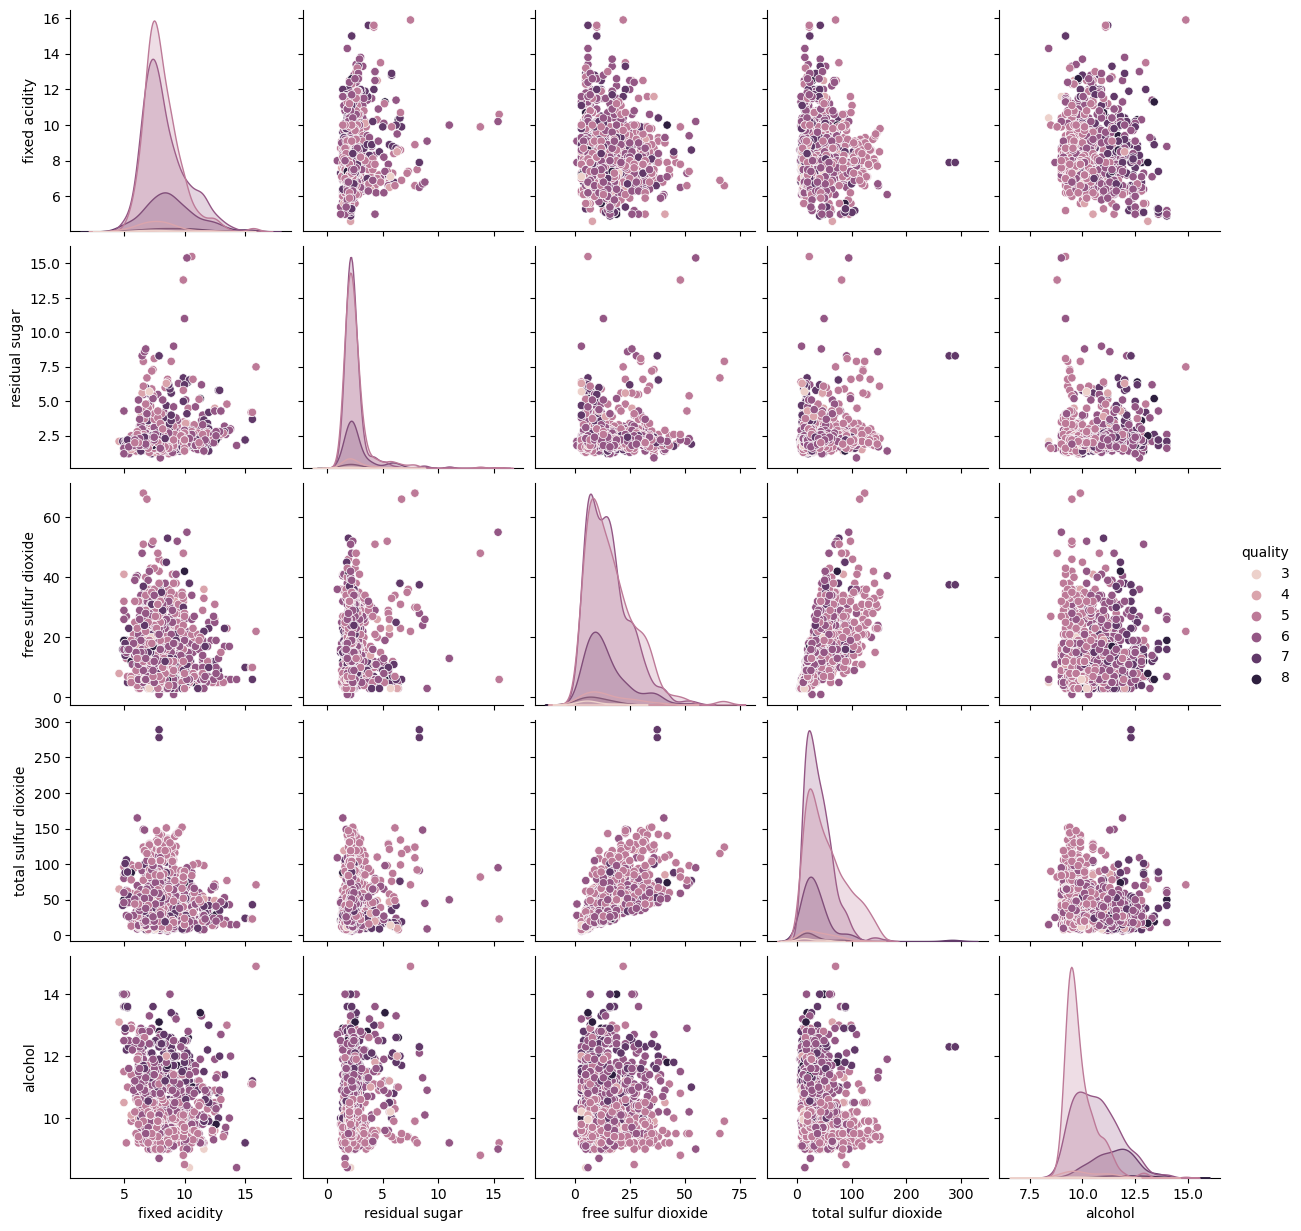

In [17]:
sns.pairplot(ds, vars=['fixed acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol'], hue='quality')
plt.show()

<h1>Logistic Regression with SKLearn</h1>
<h3> Let's use the wine's atributes to build a model that predicts the wine's qualtity!</h3>

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X = ds[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
#Break down the quality coulmn into a biniary good/bad catagorty if it's quality rating is >= 6
ds['good_or_bad'] = (ds['quality'] >= 6).astype(int)
y = ds['good_or_bad']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2)
logReg = LogisticRegression(max_iter=1000)
lr_sk = logReg.fit(X_train, y_train)
yhat = lr_sk.predict(X_test)
scores = cross_val_score(logReg, X, y, cv=5, scoring='r2')

print(np.hstack((lr_sk.intercept_[:,np.newaxis],lr_sk.coef_)))
print(f"Accuracy: {accuracy_score(y_test, yhat)*100}%")
print("Cross-Validation Scores:", scores)

[[-9.44801427  0.08285214 -2.94912048 -0.81747389  0.0160331  -0.78756503
   0.01690617 -0.01539957 -0.01352936 -0.07127143  2.31700722  0.96238299]]
Accuracy: 72.0524017467249%
Cross-Validation Scores: [-0.09047619 -0.09047619  0.06638462  0.00992556  0.00992556]


<h2>Binary Quality Column</h2>
Lets see our spilt on how many wines are being considered good (shown by a 1) or bad (shown by a 0)

In [19]:
graph = {'x': np.unique(y),
          'y': np.bincount(y)/len(y),
            'type': 'bar'}

fig = dict()
fig['data'] = [graph]
fig['layout'] = {'title': 'Binary Class Distribution',
                'autosize':False,
                'width':400,
                'height':400}

plotly.offline.iplot(fig)

<h3>80/20 Spilt?</h3>

For this dataset, an 80/20 training and testing split works because I have a decently sized dataset and my data isn't particularly complex or varied. 

<h1>One-Versus-All Logistic Regression</h1> 

<h3>Sigmoids and Predictions</h3>

In [20]:
#05. Logistic Regression.ipynb
class BinaryLogisticRegressionBase:
    # private:
    def __init__(self, eta, iterations=20, optimizer='steepest', regularization=None, C=1.0):
        self.eta = eta
        self.iters = iterations
        self.w_ = None
        # internally we will store the weights as self.w_ to keep with sklearn conventions
        self.optimizer = optimizer
        self.regularization = regularization
        self.C = C
        self.loss_history = []
    
    
    def __str__(self):
        return 'Base Binary Logistic Regression Object, Not Trainable'
    
    # convenience, private and static:
    @staticmethod
    def _sigmoid(theta):
        return 1/(1+np.exp(-theta)) 
    
    @staticmethod
    def _add_intercept(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    # public:
    def predict_proba(self, X, add_intercept=True):
        # add bias term if requested
        Xb = self._add_intercept(X) if add_intercept else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction
    
    
blr = BinaryLogisticRegressionBase(0.1)
print(blr)

Base Binary Logistic Regression Object, Not Trainable


<h3>Add the Model Training Function</h3>

In [21]:
#06. Optimization.ipynb
from numpy.linalg import pinv
class BinaryLogisticRegression(BinaryLogisticRegressionBase):
    #private:
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'
        
    def _get_gradient(self, X, y):
        h = self._sigmoid(X @ self.w_)
        gradient = -(1 / len(y)) * (X.T @ (h - y))

        if self.regularization == 'l1':
            gradient[1:] += (self.C / len(y)) * np.sign(self.w_[1:])
        elif self.regularization == 'l2':
            gradient[1:] += (self.C / len(y)) * self.w_[1:]
        elif self.regularization == 'both':
            gradient[1:] += (self.C / len(y)) * (np.sign(self.w_[1:]) + self.w_[1:])
        else: 
            return gradient
        return gradient
          
    def _steepest_ascent(self, X, y):
        gradient = np.zeros(self.w_.shape) # set gradient to zero
        for (xi,yi) in zip(X,y):
            # the actual update inside of sum
            gradi = (yi - self.predict_proba(xi,add_intercept=False))*xi 
            # reshape to be column vector and add to gradient
            gradient += gradi.reshape(self.w_.shape) 
        
        self.w_ = gradient/float(len(y))

    def _stochastic_gradient_ascent(self, X, y):
        # grab a subset of samples in a mini-batch
        # and calculate the gradient according to the small batch only
        mini_batch_size = 16
        idxs = np.random.choice(len(y), mini_batch_size)
        
        # Calculate predicted probabilities
        probabilities = self.predict_proba(X, add_intercept=False)
        
        # Ensure ydiff is a 1D array with shape (n_samples,)
        ydiff = y.ravel() - probabilities.ravel()
        
        # Calculate the gradient
        gradient = np.mean(X * ydiff[:, np.newaxis], axis=0)
        
        gradient = gradient.reshape(self.w_.shape)
        gradient[1:] += -2 * self.w_[1:] * self.C
        
        return gradient
       
    def _newton_method(self, X, y):
        g = self.predict_proba(X,add_intercept=False).ravel() # get sigmoid value for all classes
        hessian = X.T @ np.diag(g*(1-g)) @ X - 2 * self.C # calculate the hessian

        probabilities = self.predict_proba(X, add_intercept=False)
        
        # Ensure ydiff is a 1D array with shape (n_samples,)
        ydiff = y.ravel() - probabilities.ravel()
        
        # Calculate the gradient
        gradient = np.mean(X * ydiff[:, np.newaxis], axis=0)
        gradient = gradient.reshape(self.w_.shape)
        gradient[1:] += -2 * self.w_[1:] * self.C
        
        self.w_ = pinv(hessian) @ gradient

    def _quasi_newton(self, X, y):
        n, m = X.shape  # n: number of samples, m: number of features
        self.w_ = np.zeros((m, 1))  # Initialize weights to zeros
        H = np.eye(m)  # Initialize the Hessian approximation as the identity matrix

        for _ in range(self.iters):
            p = self.predict_proba(X, add_intercept=False)
            gradient = X.T @ (p - y) / n

            # BFGS update formula
            ydiff = gradient - H @ gradient
            print(ydiff.shape)
            print(X.shape)
            rho = 1 / (ydiff.T @ (X.T @ ydiff))
            H = (np.eye(m) - rho * np.outer(ydiff, X)) @ H @ (np.eye(m) - rho * np.outer(X, ydiff)) + rho * np.outer(ydiff, ydiff)

            self.w_ = self.w_ - H @ gradient

    # public:
    def fit(self, X, y):
        Xb = self._add_intercept(X) # add bias term
        num_samples, num_features = Xb.shape
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        if self.optimizer == 'steepest':
            self._steepest_ascent(Xb, y)
        elif self.optimizer == 'stochastic':
            self._stochastic_gradient_ascent(Xb, y)
        elif self.optimizer == 'newton':
            self._newton_method(Xb, y)
        elif self.optimizer == 'quasi':
            self._quasi_newton(Xb, y)
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ = self.w_ + gradient*self.eta # multiply by learning rate 


<h3>Let's Run the Binary Logistic Regression</h3>

In [22]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
y_train = y_train.to_numpy().reshape(-1, 1)
types = ['steepest', 'stochastic', 'newton']
#types = ['steepest','stochastic','newton', 'quasi']
for i in range(3):
    blr = BinaryLogisticRegression(eta=0.01, iterations=100, optimizer=types[i], regularization=None, C=0.01)
    blr.fit(X_train_scaled,y_train)
    print(types[i])
    print(blr)
    yhat = blr.predict(X_test)
    print('Accuracy: ',accuracy_score(y_test,yhat))

steepest
Binary Logistic Regression Object with coefficients:
[[ 0.08214246]
 [ 0.05643695]
 [-0.25112803]
 [ 0.09475105]
 [ 0.01423214]
 [-0.06790635]
 [-0.03183775]
 [-0.17617727]
 [-0.10683381]
 [ 0.03080429]
 [ 0.17649312]
 [ 0.33587091]]
Accuracy:  0.537117903930131
stochastic
Binary Logistic Regression Object with coefficients:
[[ 0.04281135]
 [ 0.031513  ]
 [-0.13775781]
 [ 0.05528202]
 [ 0.00646125]
 [-0.03658995]
 [-0.0201744 ]
 [-0.09596236]
 [-0.0585628 ]
 [ 0.01507833]
 [ 0.09543109]
 [ 0.18188117]]
Accuracy:  0.5414847161572053
newton
Binary Logistic Regression Object with coefficients:
[[ 0.0429771 ]
 [ 0.03170022]
 [-0.13815581]
 [ 0.05496717]
 [ 0.00648332]
 [-0.03661896]
 [-0.01998214]
 [-0.09627645]
 [-0.05848922]
 [ 0.0150928 ]
 [ 0.09569351]
 [ 0.18245897]]
Accuracy:  0.5414847161572053


<h3>Vector Binary Logistical Regression</h3>

In [23]:
from scipy.special import expit

class VectorBinaryLogisticRegression(BinaryLogisticRegression):
    # inherit from our previous class to get same functionality
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
    def _get_gradient(self, X, y):
        # Calculate predicted probabilities
        probabilities = self.predict_proba(X, add_intercept=False)
        
        # Ensure ydiff is a 1D array with shape (n_samples,)
        ydiff = y.ravel() - probabilities.ravel()
        
        # Calculate the gradient
        gradient = np.mean(X * ydiff[:, np.newaxis], axis=0)
        
        return gradient.reshape(self.w_.shape)

<h3>Make it Multi-Class!</h3>

In [24]:
class LogisticRegression:
    def __init__(self, eta, iterations=20, optimizer='steepest', regularization='l2'):
        self.eta = eta
        self.iters = iterations
        self.optimizer = optimizer
        self.regularization = regularization
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def evaluate(self, X, y):
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        return accuracy
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = (y==yval) # create a binary problem
            if self.optimizer == 'steepest':
                blr = VectorBinaryLogisticRegression(self.eta, self.iters, optimizer='steepest', regularization=self.regularization)
            elif self.optimizer == 'stochastic':
                blr = VectorBinaryLogisticRegression(self.eta, self.iters, optimizer='stochastic', regularization=self.regularization)
            elif self.optimizer == 'newton':
                blr = VectorBinaryLogisticRegression(self.eta, self.iters, optimizer='newton', regularization=self.regularization)
            elif self.optimizer == 'quasi':
                blr = VectorBinaryLogisticRegression(self.eta, self.iters, optimizer='quasi', regularization=self.regularization)
            blr.fit(X, y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for blr in self.classifiers_:
            probs.append(blr.predict_proba(X)) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return self.unique_[np.argmax(self.predict_proba(X),axis=1)] # take argmax along row

<h3>Lets run it!</h3>

In [25]:

from sklearn.metrics import accuracy_score, precision_score, recall_score
import time
accuracys = []
precision = []
recall = []
times = []
for i in range(3):
    start = time.time()
    lr = LogisticRegression(eta=0.001, iterations=500,optimizer=types[i])
    lr.fit(X_train,y_train)
    end = time.time()
    times.append(end - start)
    
    print(types[i])
    print(lr)
    yhat = lr.predict(X_test)
    accuracys.append(accuracy_score(y_test,yhat))
    precision.append(precision_score(y_test, yhat, zero_division=1))
    recall.append(recall_score(y_test, yhat))
    print('Accuracy: ',accuracys[i])

steepest
MultiClass Logistic Regression Object with coefficients:
[[-0.00609559 -0.1208654   0.03658129 -0.02445861 -0.04189064  0.00153855
  -0.28531842  0.19397925 -0.0059123  -0.02224136 -0.03330843 -0.35429232]
 [ 0.00609559  0.1208654  -0.03658129  0.02445861  0.04189064 -0.00153855
   0.28531842 -0.19397925  0.0059123   0.02224136  0.03330843  0.35429232]]
Accuracy:  0.611353711790393
stochastic
MultiClass Logistic Regression Object with coefficients:
[[ 0.00158651 -0.01007386  0.01399695 -0.00723341 -0.00629937  0.000915
  -0.03183406  0.02514055  0.00163521  0.00487448 -0.00896731 -0.07730284]
 [-0.00158651  0.01007386 -0.01399695  0.00723341  0.00629937 -0.000915
   0.03183406 -0.02514055 -0.00163521 -0.00487448  0.00896731  0.07730284]]
Accuracy:  0.6200873362445415
newton
MultiClass Logistic Regression Object with coefficients:
[[ 0.2120742  -0.00980129  0.01686591 -0.0065686  -0.00621186 -0.00032981
  -0.03182302  0.02513149 -0.21291987  0.0075697  -0.01053578 -0.07810301]


<h3>Lets Find the Best C Value, Optimization Technique, and Regularization!</h3>

We're going to go through each option for the C value and each regularization option, and run it through each of the optimizer methods to see which is the best for this dataset!

In [26]:
C_values = [0.001, 0.01, 0.1]
reg = [None, 'l1', 'l2', 'both']
best_optimizer = None
best_C = None
best_test_performance = 0.0
best_regularization = None


for optimizer in types:
    for C in C_values:
        for r in reg:
            lr = LogisticRegression(eta=C, iterations=500, optimizer=optimizer, regularization=r)
            lr.fit(X_train,y_train)
            test_performance = lr.evaluate(X_test, y_test)
            if test_performance > best_test_performance:
                best_optimizer = optimizer
                best_C = C
                best_test_performance = test_performance
                best_regularization = r

# Print the best hyperparameters
print('Best Optimization Technique:', best_optimizer)
print('Best Regularization Strength (C):', best_C)
print('Best Test Performance:', best_test_performance*100,'%')
print('Best Regularization:', best_regularization)

Best Optimization Technique: stochastic
Best Regularization Strength (C): 0.001
Best Test Performance: 62.00873362445415 %
Best Regularization: None


<h3>My Methods vs Scikit-Learn Methods</h3>
My stochastic method was my best optimization method, but the scikit-learn is still much better because it is a professional libray and I am a silly little college student.

In [27]:
from sklearn.linear_model import SGDClassifier

# Create and train an SGDClassifier
start = time.time()
stoch = SGDClassifier(loss='log_loss', max_iter=1000, random_state=42)
y_train = y_train.ravel()
stoch.fit(scaler.fit_transform(X_train), y_train)
end = time.time()
times.append(end - start)

# Predict on the test set
y_pred = stoch.predict(scaler.transform(X_test))

print(f"Accuracy: {accuracy_score(y_test, y_pred)*100}%")
accuracys.append(accuracy_score(y_test,y_pred))
precision.append(precision_score(y_test, y_pred))
recall.append(recall_score(y_test, y_pred))

Accuracy: 75.10917030567686%


See? Theirs is better than anything I could write

<h3>Accuracy vs Training Time</h3>

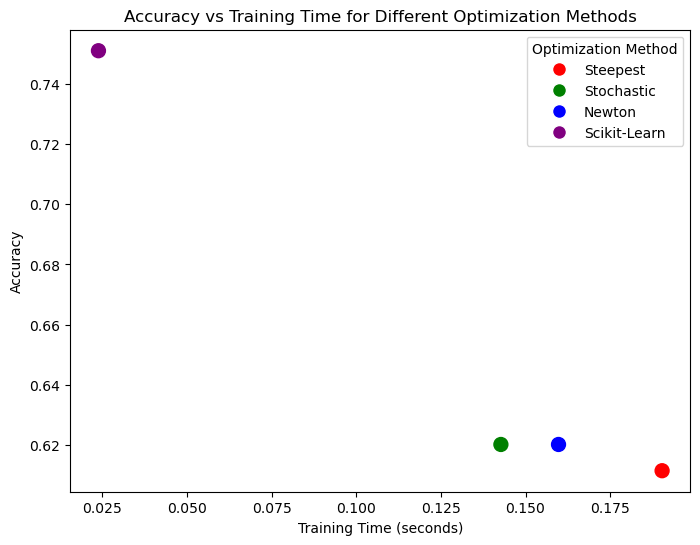

In [28]:
data = {
    'Training Time (seconds)': [times[0], times[1], times[2], times[3]], 
    'Accuracy': [accuracys[0], accuracys[1], accuracys[2], accuracys[3]],      
    'Model': ['Steepest', 'Stochastic', 'Newton', 'Scikit-Learn'] 
}

df = pd.DataFrame(data)

colors = {
    'Steepest': 'red',
    'Stochastic': 'green',
    'Newton': 'blue',
    'Scikit-Learn': 'purple'
}

plt.figure(figsize=(8, 6))
plt.scatter(df['Training Time (seconds)'], df['Accuracy'], c=[colors[method] for method in df['Model']], s=100)
plt.xlabel('Training Time (seconds)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Training Time for Different Optimization Methods')

# Add a legend with the correct labels and colors using custom legend handles
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[method], markersize=10, label=method) for method in df['Model']]
plt.legend(handles=legend_handles, title='Optimization Method')

plt.show()

The steepest method seems to be my wost, as it takes the longest to train and had the worst accuracy, with the stochastic and newton having very similar accuracies, but stochastic being a bit faster. Scikit-Learn is, of course, the fastest and most accurate. 

<h2>Model Comparison Plots</h2>
Lets compare our models

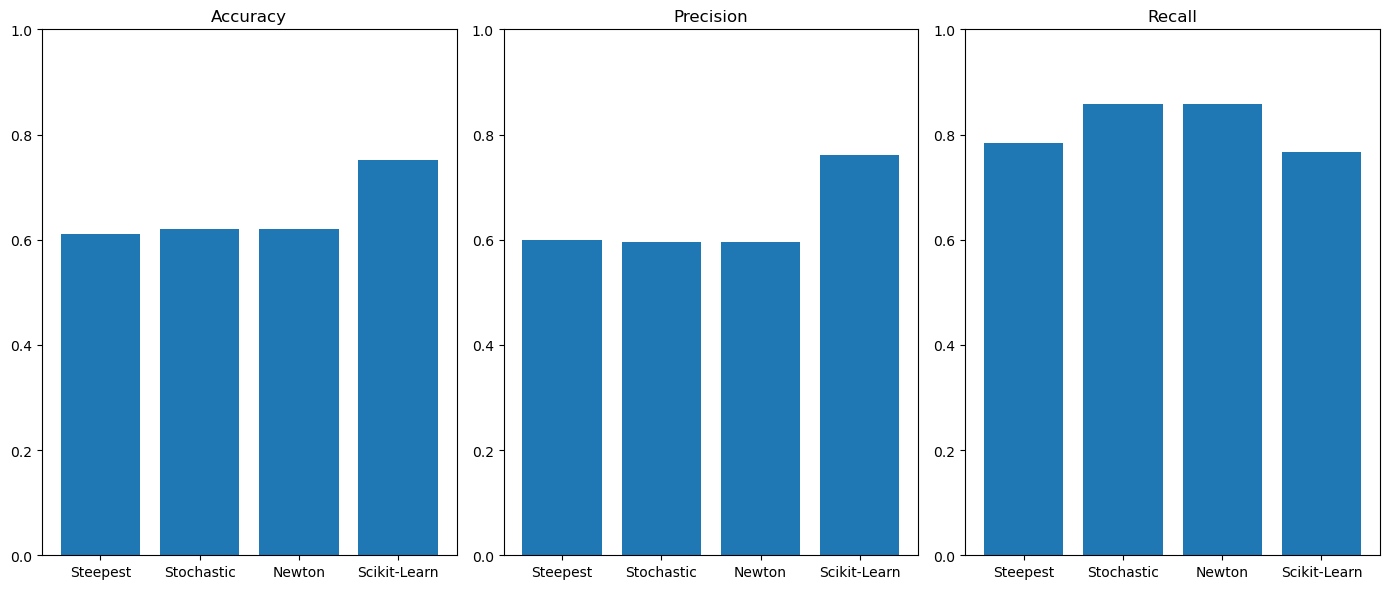

In [29]:
data = {
    'Model': ['Steepest', 'Stochastic', 'Newton', 'Scikit-Learn'],  # Names of the models
    'Accuracy': [accuracys[0], accuracys[1], accuracys[2], accuracys[3]],  # Accuracy values for each model
    'Precision': [precision[0], precision[1], precision[2], precision[3]],  # Precision values for each model
    'Recall': [recall[0], recall[1], recall[2], recall[3]],  # Recall values for each model
}

df = pd.DataFrame(data)

plt.figure(figsize=(14, 6))

# List of models (x-axis)
models = df['Model']

# Metrics to compare (y-axis)
metrics = ['Accuracy', 'Precision', 'Recall']

# Create subplots for each metric
for i, metric in enumerate(metrics):
    plt.subplot(1, len(metrics), i + 1)
    plt.bar(models, df[metric])
    plt.title(f'{metric}')
    plt.ylim(0, 1)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In the above model, it compares: the accuracy (how many overall predictions are correct) between my custom optimization methods, the precision (how accurate the model is at identifying positive cases), and the recall (the model's ability to catch all positive cases). You can see the recall is high across all my models, high recall is good for situations when you want to avoid false negatives. My precision and accuracy aren't great overall, but it seems to be a problem with the dataset. 

<h1>Deployment</h1>
<h3>Which implementation of logistic regression would you advise be used in a deployed machine learning model, your implementation or scikit-learn (or other third party)? Why?</h3>

Stochastic Gradient Descent would be my choice, it's especially good with larger datasets and can be made to update the model as new data is added. Definitely not my version though, scikit-learn has a great version you could use. :-) It has a much better accuracy and precision than my methods. The recall is lower than mine, but since the dataset is just about which features make higher quality wine, I'm not too worried about the consequenses of false negatives.